In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
two_blobs = pd.read_csv('cluster_two_blobs.csv')
two_blobs_outliers = pd.read_csv('cluster_two_blobs_outliers.csv')

In [3]:
two_blobs

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215
...,...,...
995,-9.895227,-6.644544
996,-9.544007,-6.060362
997,0.713958,1.560460
998,0.954444,0.889178


In [4]:
two_blobs_outliers

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215
...,...,...
998,0.954444,0.889178
999,-8.867767,-5.635758
1000,-4.000000,-2.000000
1001,0.000000,-8.000000


<Axes: xlabel='X1', ylabel='X2'>

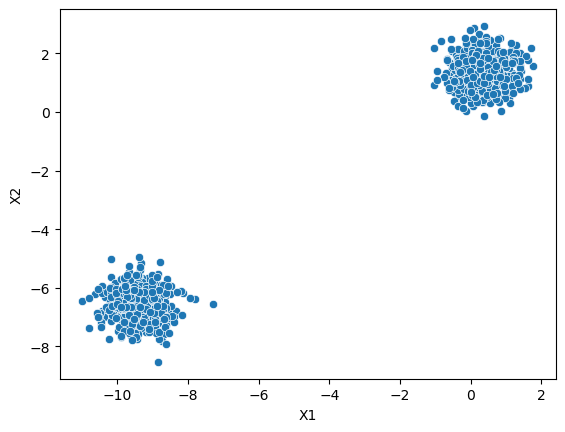

In [5]:
sns.scatterplot(data=two_blobs,x='X1',y='X2')

<Axes: xlabel='X1', ylabel='X2'>

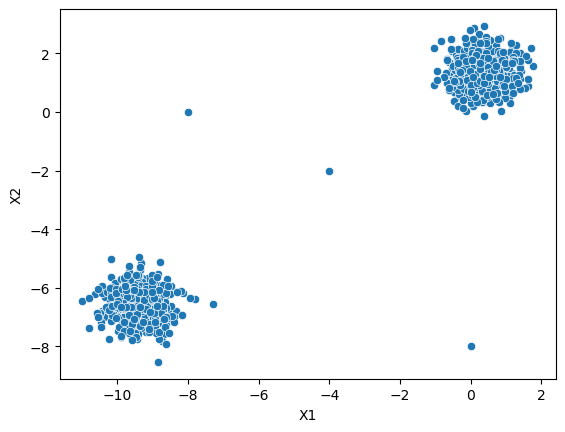

In [6]:
sns.scatterplot(data=two_blobs_outliers, x='X1',y='X2')

### Label Discovery

In [7]:
def find_labels(mod,data):
    labels = mod.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

### DBSCAN

In [9]:
from sklearn.cluster import DBSCAN
#help(DBSCAN)

dbscan = DBSCAN()

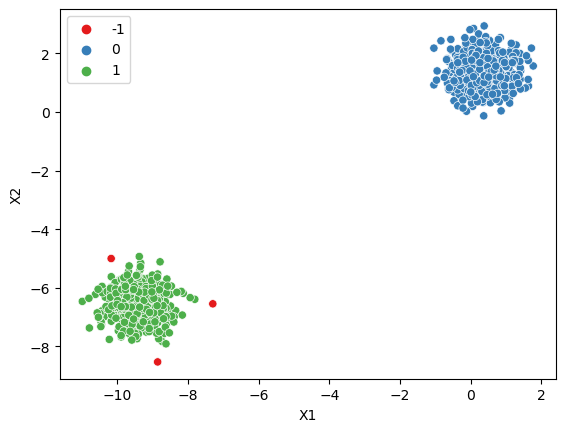

In [10]:
find_labels(dbscan,two_blobs)

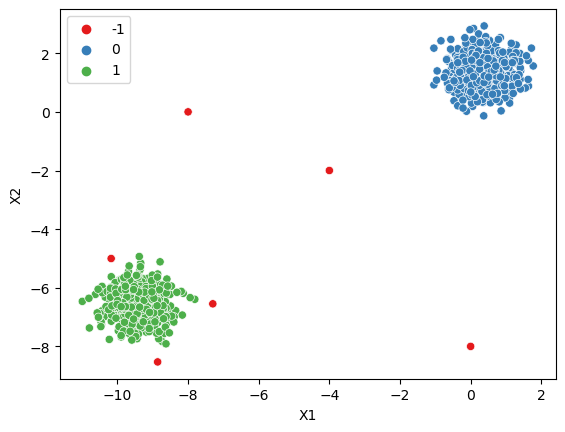

In [11]:
find_labels(dbscan,two_blobs_outliers)

# Epsilon

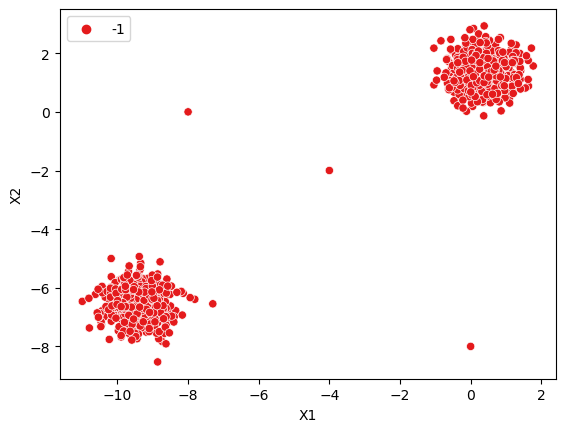

In [12]:
db = DBSCAN(eps=0.001)
find_labels(db,two_blobs_outliers)

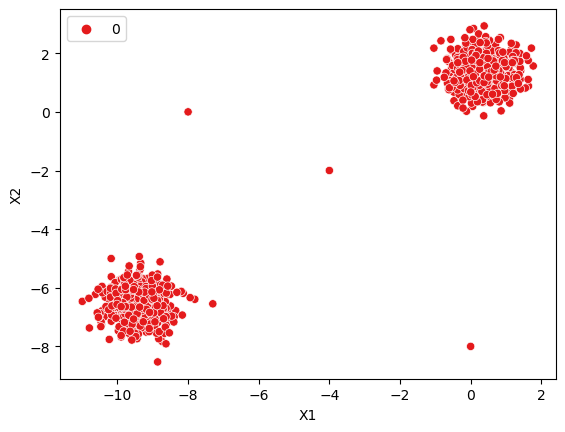

In [13]:
db = DBSCAN(eps=1001)
find_labels(db,two_blobs_outliers)

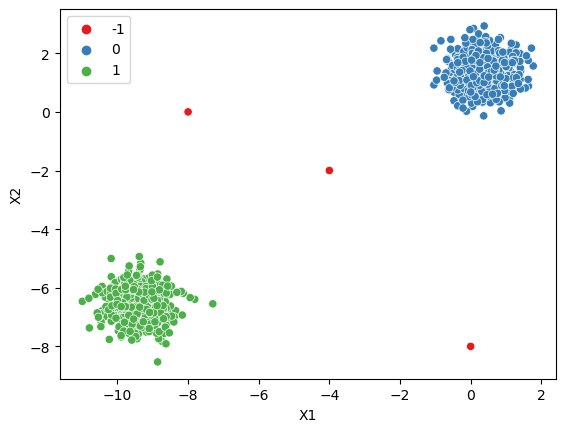

In [42]:
db = DBSCAN(eps=1)
find_labels(db,two_blobs_outliers)

In [25]:
db.labels_

array([ 0,  1,  0, ..., -1, -1, -1])

In [26]:
np.sum(db.labels_ == -1)

3

In [27]:
3/1003

0.0029910269192422734

In [29]:
100*np.sum(db.labels_ == -1)/len(dbscan.labels_)

0.29910269192422734

### Finding reasonable Epsilon Values

In [35]:
outlier_percent = []
number_of_outliers = []

for e in np.linspace(.001,10,100):
    
    #Create Model
    dbscan = DBSCAN(eps = e)
    dbscan.fit(two_blobs_outliers)
    
    #Record the number of outliers
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    #Record the percentage of points that are outliers
    outlier_percent.append(100*np.sum(dbscan.labels_ == -1)/len(dbscan.labels_))

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


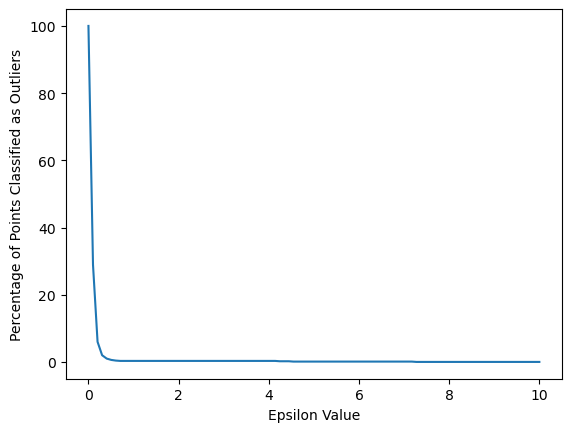

In [36]:
sns.lineplot(x=np.linspace(.001,10,100), y = outlier_percent)
plt.ylabel('Percentage of Points Classified as Outliers')
plt.xlabel('Epsilon Value')
plt.show()

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


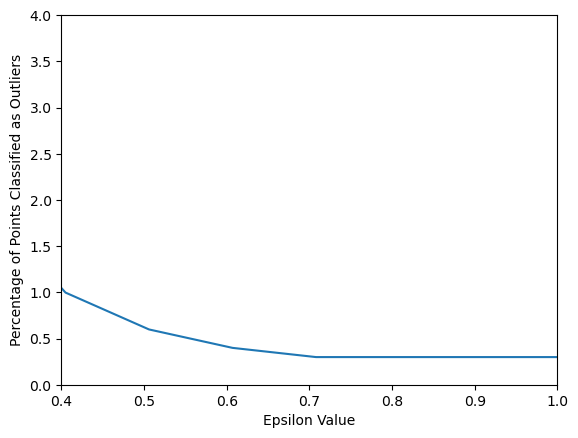

In [44]:
sns.lineplot(x=np.linspace(.001,10,100), y = outlier_percent)
plt.ylabel('Percentage of Points Classified as Outliers')
plt.xlabel('Epsilon Value')
plt.xlim(0.4,1)
plt.ylim(0,4)
plt.show()

## In terms of Number of outliers

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


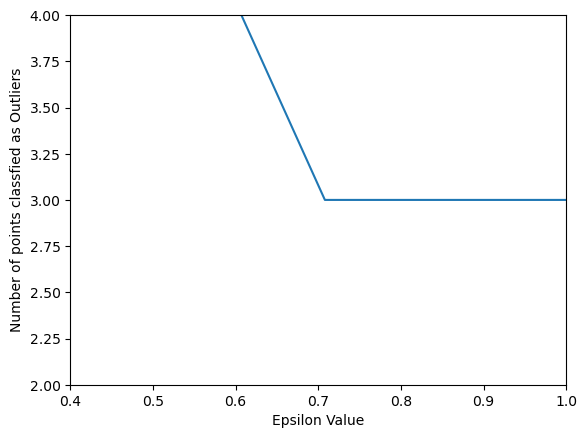

In [50]:
sns.lineplot(x=np.linspace(.001,10,100),y=number_of_outliers)
plt.ylabel('Number of points classfied as Outliers')
plt.xlabel('Epsilon Value')
plt.ylim(2,4)
plt.xlim(0.4,1)
plt.show()

## Minimum Samples

In [51]:
outlier_percent = []

for n in np.arange(1,100):
    
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers)
    
    outlier_percent.append(100*np.sum(dbscan.labels_==-1)/len(dbscan.labels_))

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


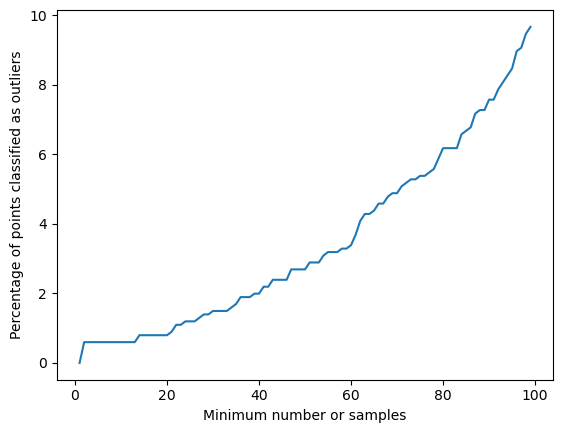

In [54]:
sns.lineplot(x=np.arange(1,100),y=outlier_percent)
plt.ylabel('Percentage of points classified as outliers')
plt.xlabel('Minimum number or samples')
plt.show()

### It has been emperically found that a good suggestion on min number of samples is twice the dimensions of our dataset

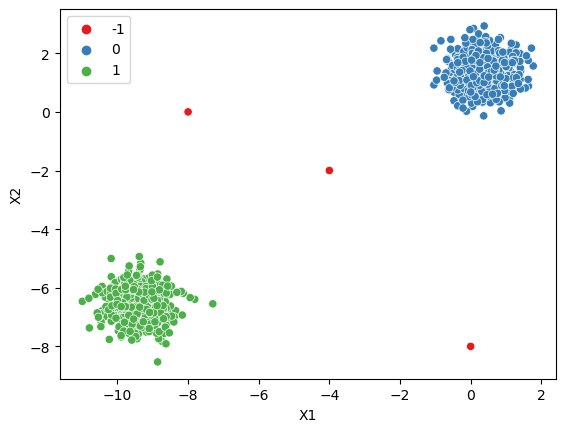

In [59]:
dbs = DBSCAN(eps = 0.7 , min_samples=2 * two_blobs_outliers.shape[1])
find_labels(dbs,two_blobs_outliers)

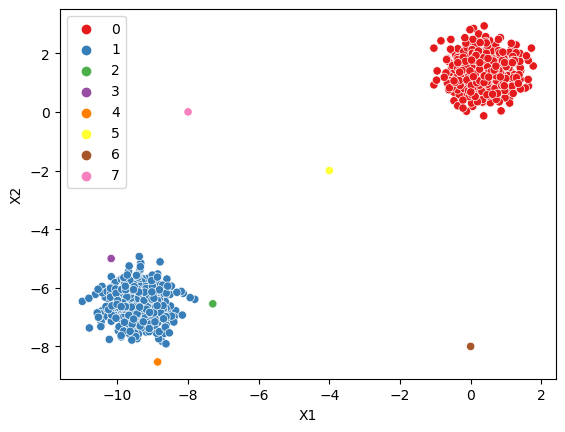

In [63]:
dbs = DBSCAN(eps = 0.5 , min_samples=1)
find_labels(dbs,two_blobs_outliers)